In [9]:
!pip install tweepy
!pip install ibm_watson

In [10]:
import os
 
# Import tweepy to work with the twitter API
import tweepy as tw

# Import pandas to work with dataframes
import pandas as pd

In [11]:
consumer_key = 'AFzqQ5ETQ2KWWi0bz2n2HfSfS'
consumer_secret = 'aiVvwehud1p76JziBCYqxFRlXhun4A6ReskUYPQ8m8k1iDj3le'
access_token = '44354765-DkD8NQj4WjPrtcwIHWD3M13MpFOADk9j85klOFHtJ'
access_token_secret = 'D7vqp3mm9wDZ8jgR3uoBOz1puFlLN519aTIdhrPwDmJwD'

In [12]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [13]:
handle = 'ranjanvaid'

In [14]:
res = api.user_timeline(screen_name=handle, count=100, include_rts=True)

In [15]:
tweets = [tweet.text for tweet in res]

In [16]:
tweets

['Ed Woodward is a disgrace #MUFC #WoodwardOut #GlazersOutWoodwardOut https://t.co/hfp1bmuyVI',
 'Lindelof is a defender #MUNCRY #WoodwardOut #GlazersOutWoodwardOut https://t.co/RBHdb5GYlF',
 '@ManUtd #WoodwardOut #WoodwardOutGlazersOut https://t.co/mxgiAdLzEG',
 '3 palace goals , 3 Lindelof mistakes. He should never come anywhere near the starting 11. Extremely poor all around… https://t.co/0zbXZrOtoI',
 '@ManUtd I understand Ole, team doing that but what about useless woodward and thieving glazers #MUFC #GLAZERSOUT… https://t.co/uV0r0b1GKb',
 'Enough is enough. Fuck off  #GlazersOutWoodwardOut #GlazersOut #WoodwardOut #MUFC https://t.co/yTViAzebqu',
 '@ManUtd @Daniel_James_97 Sign someone 🤬 https://t.co/RjxtIW51pI',
 '@ManUtd Time to sign some players https://t.co/Cr2FiUQQ8L',
 '@ManUtd https://t.co/YmHZ6wqYod',
 '@utdreport @Footy_Headlines https://t.co/WtHU0zWQr9',
 '@vdsar1970 @ManUtd #MUFC https://t.co/bmXSuHbE50',
 '@talkSPORT Yeah he can start coaching too, the same way he’s do

In [17]:
text = ''.join(str(tweet) for tweet in tweets)

In [18]:
text

'Ed Woodward is a disgrace #MUFC #WoodwardOut #GlazersOutWoodwardOut https://t.co/hfp1bmuyVILindelof is a defender #MUNCRY #WoodwardOut #GlazersOutWoodwardOut https://t.co/RBHdb5GYlF@ManUtd #WoodwardOut #WoodwardOutGlazersOut https://t.co/mxgiAdLzEG3 palace goals , 3 Lindelof mistakes. He should never come anywhere near the starting 11. Extremely poor all around… https://t.co/0zbXZrOtoI@ManUtd I understand Ole, team doing that but what about useless woodward and thieving glazers #MUFC #GLAZERSOUT… https://t.co/uV0r0b1GKbEnough is enough. Fuck off  #GlazersOutWoodwardOut #GlazersOut #WoodwardOut #MUFC https://t.co/yTViAzebqu@ManUtd @Daniel_James_97 Sign someone 🤬 https://t.co/RjxtIW51pI@ManUtd Time to sign some players https://t.co/Cr2FiUQQ8L@ManUtd https://t.co/YmHZ6wqYod@utdreport @Footy_Headlines https://t.co/WtHU0zWQr9@vdsar1970 @ManUtd #MUFC https://t.co/bmXSuHbE50@talkSPORT Yeah he can start coaching too, the same way he’s doing in barca for the last few years. https://t.co/YLwWnW

In [19]:
from ibm_watson import PersonalityInsightsV3

from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [20]:
apikey = 'UwDQ95TK3AVeo1pTMwaZExOf-2XzPhLcsUd0DRTTTeYg'
url = 'https://api.eu-gb.personality-insights.watson.cloud.ibm.com/instances/811fad92-5e2c-4f3d-bd47-b4793a086ad5'

In [21]:
authenticator = IAMAuthenticator(apikey)
personality_insights = PersonalityInsightsV3(
        version='2017-10-13', 
        authenticator=authenticator
)
personality_insights.set_service_url(url)

In [22]:
profile = personality_insights.profile(text, accept='application/json').get_result()
profile

{'word_count': 1240,
 'processed_language': 'en',
 'personality': [{'trait_id': 'big5_openness',
   'name': 'Openness',
   'category': 'personality',
   'percentile': 0.5662500329771045,
   'significant': True,
   'children': [{'trait_id': 'facet_adventurousness',
     'name': 'Adventurousness',
     'category': 'personality',
     'percentile': 0.009165041640591454,
     'significant': True},
    {'trait_id': 'facet_artistic_interests',
     'name': 'Artistic interests',
     'category': 'personality',
     'percentile': 0.007364846150765658,
     'significant': True},
    {'trait_id': 'facet_emotionality',
     'name': 'Emotionality',
     'category': 'personality',
     'percentile': 0.17287270835448137,
     'significant': True},
    {'trait_id': 'facet_imagination',
     'name': 'Imagination',
     'category': 'personality',
     'percentile': 0.3561428247947488,
     'significant': True},
    {'trait_id': 'facet_intellect',
     'name': 'Intellect',
     'category': 'personality'

In [23]:
for personality in profile['personality']:
    print(personality['name'], personality['percentile'])

Openness 0.5662500329771045
Conscientiousness 0.16335278627020677
Extraversion 0.05458635121994909
Agreeableness 0.011771403098236655
Emotional range 0.6971815604030377


In [24]:
for personality in profile['values']:
    print(personality['name'], personality['percentile'])

Conservation 0.1828258020494029
Openness to change 0.27094575479274935
Hedonism 0.2017092892447513
Self-enhancement 0.2137676460422589
Self-transcendence 0.017065764407990458


In [36]:
for personality in profile['needs']:
    print(personality['name'], personality['percentile'])

Challenge 0.266041611369752
Closeness 0.06164276337653407
Curiosity 0.05692991722883384
Excitement 0.2995725955570022
Harmony 0.06955474298962583
Ideal 0.19303701393402062
Liberty 0.10049970680697357
Love 0.037133025880958015
Practicality 0.6650508984441036
Self-expression 0.05887347018060718
Stability 0.11362777374138305
Structure 0.4489187613101049


In [37]:
# Import matplotlib 
from matplotlib import pyplot as plt
# Import seaborn
import seaborn as sns

In [38]:
# Visualise profiles 
needs = profile['needs']
result = {need['name']:need['percentile'] for need in needs}
df = pd.DataFrame.from_dict(result, orient='index')
df.reset_index(inplace=True)
df.columns = ['need', 'percentile']

In [39]:
df.head()

,need,percentile
0,Challenge,0.266042
1,Closeness,0.061643
2,Curiosity,0.056930
3,Excitement,0.299573
4,Harmony,0.069555


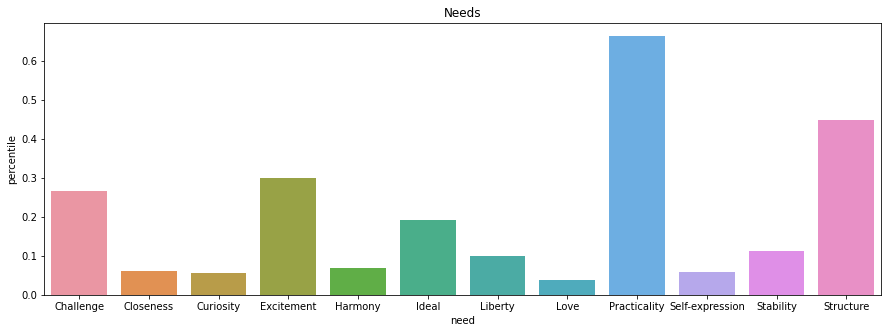

In [40]:
# Create Plot
plt.figure(figsize=(15,5))
sns.barplot(y='percentile', x='need', data=df).set_title('Needs')
plt.show()

In [34]:
def create_trait_plot(name, traits):
    result = {trait['name']:trait['percentile'] for trait in traits}
    df=pd.DataFrame.from_dict(result, orient='index')
    df.reset_index(inplace=True)
    df.columns = ['need', 'percentile']
    plt.figure(figsize=(15,5))
    sns.barplot(y='percentile', x='need', data=df).set_title(name)
    plt.show()

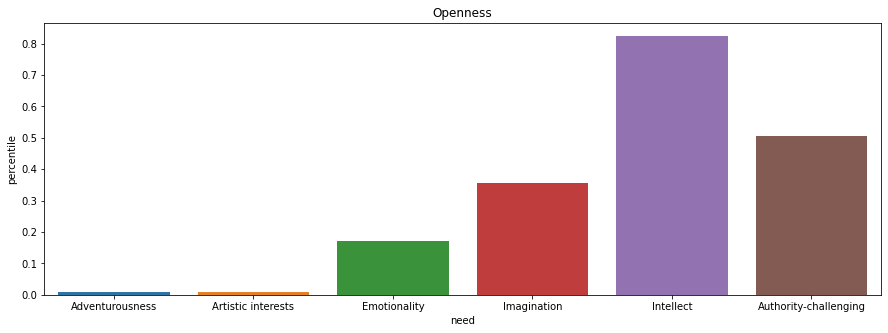

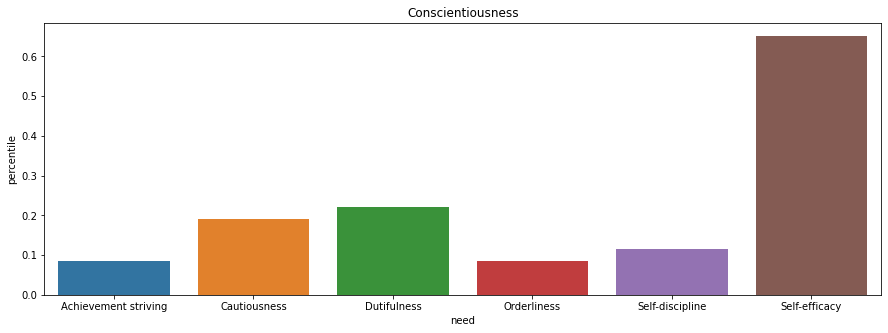

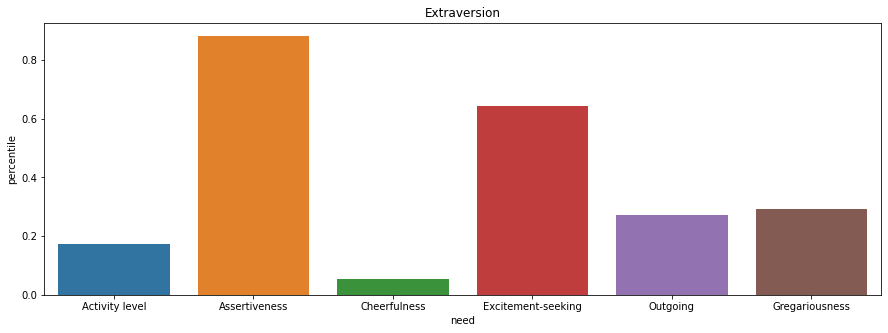

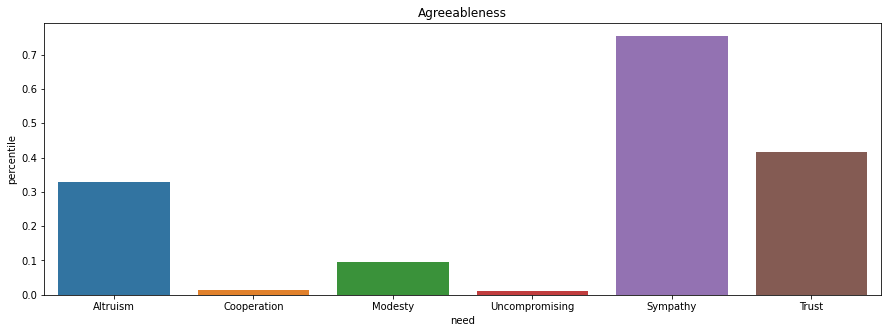

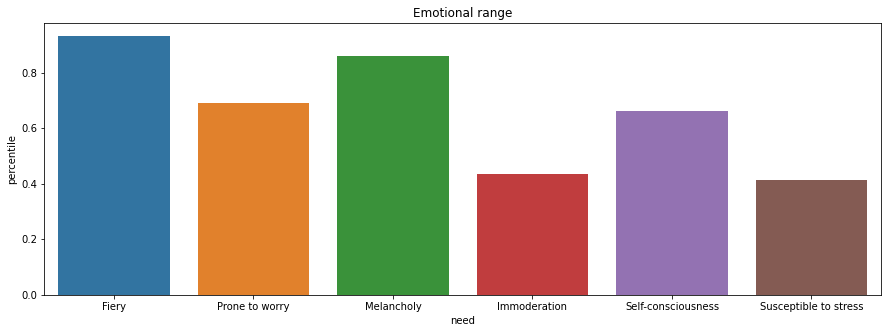

[None, None, None, None, None]

In [41]:
[create_trait_plot(personality_trait['name'], personality_trait['children']) for personality_trait in profile['personality']]